In [1]:

from rocketshp import config

2024-09-24 17:47:47.390 | INFO     | rocketshp.config:<module>:11 - PROJ_ROOT path is: /mnt/home/ssledzieski/Projects/rocketshp


In [2]:
from rocketshp.convert_mdCATH import convert_to_mdtraj

MDCATH_DIR = f"{config.RAW_DATA_DIR}/mdcath"
TEMP = "348"
REPL = "0"

ModuleNotFoundError: No module named 'rocketshp.convert_mdCATH'

In [63]:
DOMAIN = "1xwrB00"

In [64]:
traj = convert_to_mdtraj(f"{MDCATH_DIR}/mdcath_dataset_{DOMAIN}.h5", TEMP, REPL)

In [65]:
traj.save_pdb(f"{config.INTERIM_DATA_DIR}/{DOMAIN}_traj.pdb")

In [67]:
print(f"foldseek structureto3didescriptor {config.INTERIM_DATA_DIR}/{DOMAIN}_traj.pdb {config.INTERIM_DATA_DIR}/{DOMAIN}_traj.3di")

foldseek structureto3didescriptor /mnt/home/ssledzieski/Projects/rocketshp/data/interim/1xwrB00_traj.pdb /mnt/home/ssledzieski/Projects/rocketshp/data/interim/1xwrB00_traj.3di


In [68]:
import pandas as pd

In [69]:
df = pd.read_csv(
    f"{config.INTERIM_DATA_DIR}/{DOMAIN}_traj.3di",
    sep="\t", header=None, usecols=[1, 2],
    names = ["sequence", "3di"]
)

In [70]:
df.head()

,sequence,3di
0,ANKRNEALRIESALLNKIAMLGTEKTAEAVGVDKSQISRWKRDWIP...,DVLLVVLVQQLVLVVVLCVLVPVVVVCVVVPHDPVCSCVCNPPVSS...
1,ANKRNEALRIESALLNKIAMLGTEKTAEAVGVDKSQISRWKRDWIP...,DVQQVVLVVQLVVVVVVCVLCDDVNCCPPVNDDVVCPVVCSVPVSS...
2,ANKRNEALRIESALLNKIAMLGTEKTAEAVGVDKSQISRWKRDWIP...,DPLVVQLVVALVVVVVVVVLCDDVNVCVVVVHDPVCVVVVNVPCSS...
3,ANKRNEALRIESALLNKIAMLGTEKTAEAVGVDKSQISRWKRDWIP...,DDQQVVLVQAQVVVLVVCVQVDQPVCCVPVVDHSVCSVVCVVPCRS...
4,ANKRNEALRIESALLNKIAMLGTEKTAEAVGVDKSQISRWKRDWIP...,DVLVVQLVQLLVVLVLVCVLCDDPSCCVPVVDDPVCVPVCNPPCSS...


In [71]:
import nglview as nv
import numpy as np
import seaborn as sns
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from matplotlib import pyplot as plt
from scipy.stats import entropy

In [72]:
seqrecs = [SeqRecord(Seq(r["3di"]), id=f"frame{i}") for i,r in df.iterrows()]

In [73]:
msa = MultipleSeqAlignment(seqrecs)

[[0.         0.01555556 0.00222222 ... 0.         0.         0.        ]
 [0.         0.11333333 0.06222222 ... 0.         0.         0.        ]
 [1.         0.17777778 0.19111111 ... 0.45555556 0.48444444 1.        ]
 ...
 [0.         0.36888889 0.06888889 ... 0.07333333 0.04666667 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.00444444 0.        ]]
[0.         1.63532881 1.46672926 1.49424119 0.62546057 1.25565225
 0.44463075 0.35845241 1.37326121 1.39405372 0.61823692 1.01703903
 0.93984589 0.92014283 0.90328783 1.08478781 1.20132234 0.42152777
 1.3188409  1.76013629 1.64606101 1.25171464 1.63739069 1.43754916
 1.07261279 1.02383304 0.63617548 0.34181816 0.7793938  1.08167193
 0.86578442 1.00641678 0.49649215 1.41413206 0.28979747 0.98635657
 1.2991245  0.36877171 0.54932857 1.54982771 1.50716045 1.81121922
 1.51095865 1.58898585 0.72390162 0.90285332 0.09803911 1.10883288
 0.33743096 0.922361

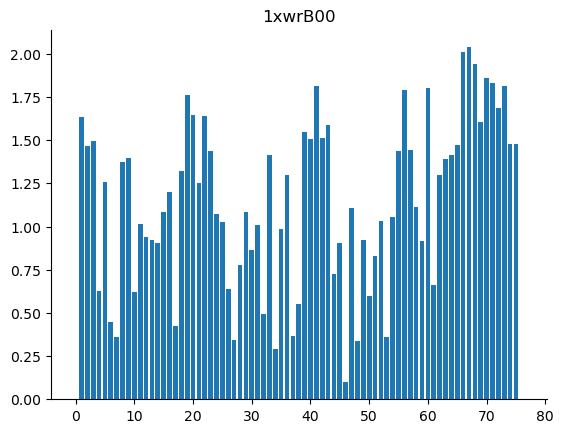

In [74]:
def pssm_to_numpy(pssm):
    npm = []
    for i, r in enumerate(pssm):
        npm.append(list(r.values()))

    return np.array(npm).T

from Bio.motifs import Motif


def msa_to_counts(msa):
    alignment = msa.alignment
    motif = Motif(alphabet="ACDEFGHIKLMNPQRSTVWY", alignment=alignment)
    counts = motif.counts
    return np.array(list(counts.values()))

npm = msa_to_counts(msa)
pssm_dist = npm / npm.sum(0)
pssm_ent = entropy(pssm_dist)

print(pssm_dist)
print(pssm_ent)
print(pssm_ent.shape)

plt.bar(np.arange(npm.shape[1]), pssm_ent)
plt.title(DOMAIN)
sns.despine()
# plt.savefig(Path(align_3di).with_suffix(".entropy.png"))
# np.save(Path(align_3di).with_suffix(".entropy.npy"), pssm_ent)

In [75]:
def minmax(v):
    return (v - v.min()) / (v.max() - v.min())

In [76]:
normalized_entropy = minmax(pssm_ent)

In [77]:
normalized_entropy

array([0.        , 0.80263579, 0.71988544, 0.73338857, 0.30698232,
       0.61628672, 0.21822923, 0.17593204, 0.67401038, 0.68421555,
       0.30343688, 0.49917296, 0.46128579, 0.45161533, 0.44334273,
       0.53242474, 0.58962105, 0.20689006, 0.64730034, 0.86389255,
       0.80790325, 0.6143541 , 0.80364778, 0.70556355, 0.52644912,
       0.50250753, 0.31224131, 0.16776778, 0.3825343 , 0.53089543,
       0.42493568, 0.49395945, 0.24368333, 0.6940702 , 0.14223551,
       0.4841137 , 0.63762333, 0.18099685, 0.26961597, 0.76067099,
       0.73972947, 0.88896456, 0.74159366, 0.7798902 , 0.35529818,
       0.44312947, 0.04811858, 0.5442263 , 0.1656145 , 0.4527041 ,
       0.2938055 , 0.40693303, 0.50730682, 0.17672963, 0.51833496,
       0.7049405 , 0.87845353, 0.70936764, 0.54623058, 0.44922712,
       0.88425693, 0.3248741 , 0.63674914, 0.68156386, 0.69334232,
       0.72330991, 0.98526627, 1.        , 0.95384303, 0.78799027,
       0.91344199, 0.89860942, 0.82822552, 0.88908947, 0.72381

In [78]:
traj_sp = traj.superpose(traj[0])

In [79]:
import matplotlib as mpl

cmap = mpl.colormaps['inferno']

In [80]:
def get_residue_numbering(traj):
    return [i.resSeq for i in traj._topology._residues]

In [81]:
def build_selection_scheme(residue_numbering, color_factor, cm):
    assert len(residue_numbering) == len(color_factor)

    schema = []
    for rn, cf in zip(residue_numbering, color_factor):
        schema.append([mpl.colors.to_hex(cm(cf)), str(rn)])

    return schema


In [82]:
from nglview.color import ColormakerRegistry

cm = ColormakerRegistry
# cm.add_selection_scheme('entropy', [['#fffccc', '17-35'], ['red', '36-86']])
cm.add_selection_scheme('entropy', build_selection_scheme(get_residue_numbering(traj), normalized_entropy, mpl.colormaps['inferno']))

view = nv.show_mdtraj(traj_sp,default=False)
view.center()
# view.add_representation('surface', component=2, color='awesome')
view.add_cartoon(color='entropy')
view

NGLWidget(max_frame=449)